In [1]:
import datetime
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#with no news
df = pd.read_csv('./datawithnewsscorev2.csv')
df.fillna(0,inplace=True)

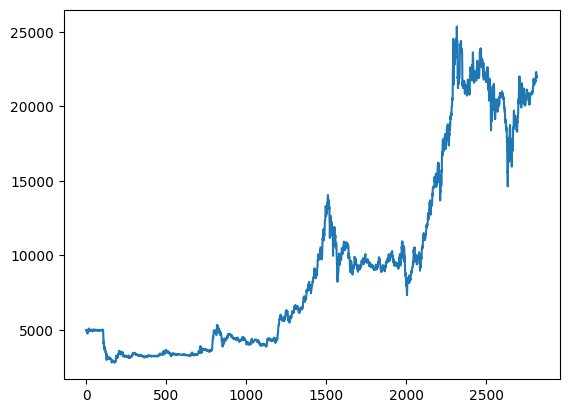

In [3]:
plt.plot(df['Close'])

In [4]:
df['Return'] = df['Close'].pct_change()
#for checking
show = df[['Close','Return']]
show.head()

,Close,Return
0,4970.0,NaN
1,4990.0,0.004024
2,4990.0,0.000000
3,4950.0,-0.008016
4,4990.0,0.008081


In [5]:
df2=df[['Close']]

df2

,Close
0,4970.0
1,4990.0
2,4990.0
3,4950.0
4,4990.0
...,...
2812,21900.0
2813,22050.0
2814,22050.0
2815,22000.0


In [6]:
# Prediction 100 days into the future.
future_days = 235
df2['Prediction'] = df2['Close'].shift(-future_days)

C:\Users\JamesDonKey\AppData\Local\Temp\ipykernel_11476\1604193394.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Prediction'] = df2['Close'].shift(-future_days)


In [7]:
x = np.array(df2.drop(['Prediction'], axis = 1))[:-future_days]
print(x)

[[ 4970.]
 [ 4990.]
 [ 4990.]
 ...
 [20090.]
 [20090.]
 [20210.]]


In [8]:
y = np.array(df2['Prediction'])[:-future_days]
print(y)

[ 3220.  3220.  3270. ... 22050. 22000. 21950.]


In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(2065, 1)
(517, 1)
(2065,)
(517,)


In [10]:
from sklearn.tree import DecisionTreeRegressor
# Implementing Linear and Decision Tree Regression Algorithms.
# Implementing Decision Tree Regression Algorithms.

tree = DecisionTreeRegressor().fit(x_train, y_train)

In [11]:
x_future = df2.drop(['Prediction'], axis = 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[23760.],
       [23590.],
       [22450.],
       [21380.],
       [21580.],
       [21690.],
       [21350.],
       [21220.],
       [21480.],
       [21380.],
       [21380.],
       [21420.],
       [21720.],
       [21480.],
       [21690.],
       [21580.],
       [21320.],
       [21050.],
       [20850.],
       [20920.],
       [21120.],
       [21450.],
       [21250.],
       [21120.],
       [21120.],
       [21380.],
       [21050.],
       [21120.],
       [20950.],
       [21080.],
       [21050.],
       [20720.],
       [21050.],
       [20950.],
       [20850.],
       [21020.],
       [21790.],
       [21790.],
       [21790.],
       [21580.],
       [21520.],
       [21380.],
       [21580.],
       [21580.],
       [21220.],
       [21120.],
       [20880.],
       [20780.],
       [20980.],
       [21280.],
       [22050.],
       [21850.],
       [22150.],
       [22620.],
       [22390.],
       [22390.],
       [22320.],
       [22350.],
       [22320.

In [12]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)

[20225.         20445.         20630.         20033.33333333
 19268.33333333 20880.         20820.         20880.
 20095.         20033.33333333 20033.33333333 20720.
 20840.         20095.         20880.         19268.33333333
 20615.         20318.33333333 20030.         19860.
 20005.         20720.         20530.         20005.
 20005.         20033.33333333 20318.33333333 20005.
 19860.         20050.         20318.33333333 20465.
 20318.33333333 19860.         20030.         19090.
 19572.         19572.         19572.         19268.33333333
 18540.         20033.33333333 19268.33333333 19268.33333333
 20880.         20005.         17540.         19085.
 16710.         15580.         18683.33333333 19756.25
 17680.         19890.         18025.         18025.
 18218.         18796.66666667 18218.         18683.33333333
 17710.         18218.         17680.         17865.
 20840.         18796.66666667 18270.         18660.
 19323.33333333 16830.         19150.         18270.
 178

In [13]:
predictions = tree_prediction 
valid = df2[x.shape[0]:]
valid['Predictions'] = predictions

C:\Users\JamesDonKey\AppData\Local\Temp\ipykernel_11476\2621502307.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


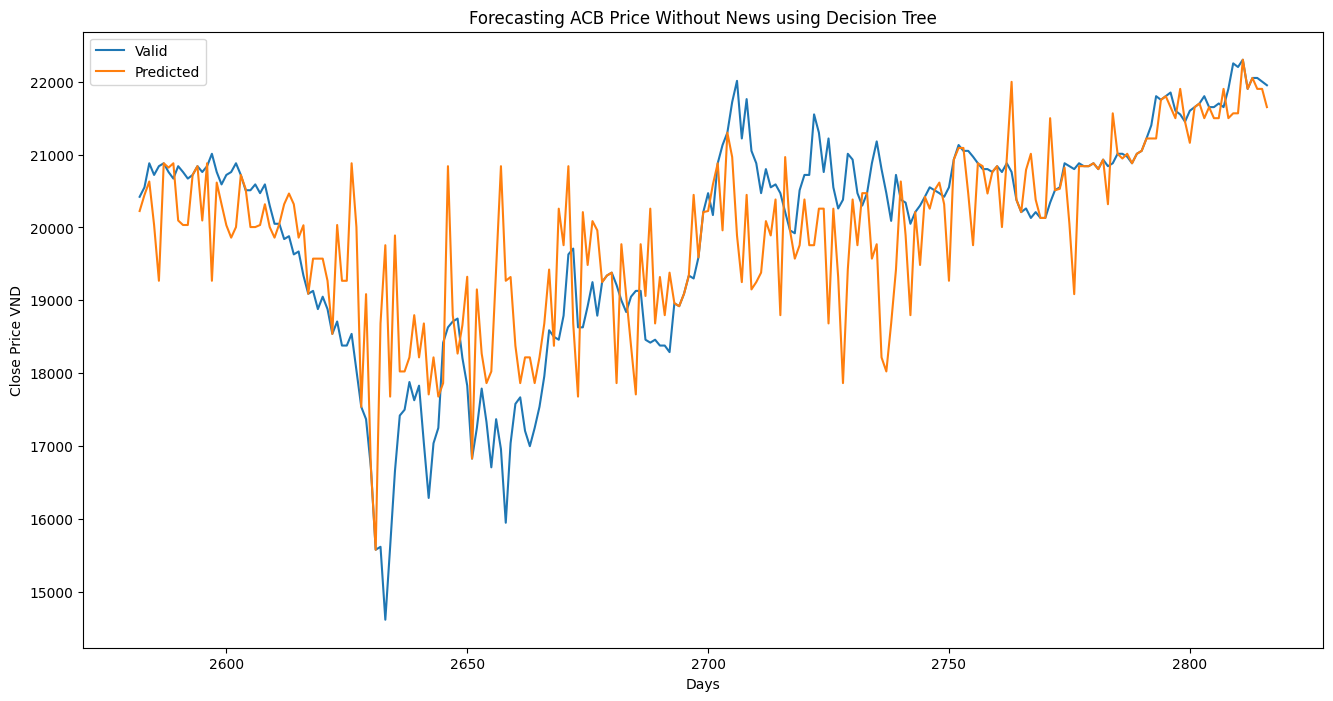

In [14]:
plt.figure(figsize=(16,8))
plt.title("Forecasting ACB Price Without News using Decision Tree")
plt.xlabel('Days')
plt.ylabel('Close Price VND')
#plt.plot(df2['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(["Valid", 'Predicted'])
#plt.legend(["Original", "Valid", 'Predicted'])
plt.savefig('DT_withNews.png')
plt.show()

In [15]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,mean_absolute_percentage_error

print('Test R2 Score: ', r2_score(valid['Close'], valid['Predictions']))
print('Test MAE: ', mean_absolute_error(valid['Close'], valid['Predictions']))
print('Test RMSE: ', mean_squared_error(valid['Close'], valid['Predictions'], squared=False))
print('Test MAPE: ',mean_absolute_percentage_error(valid['Close'], valid['Predictions']))

Test R2 Score:  0.540751681364501
Test MAE:  677.2975177304966
Test RMSE:  1036.891393269406
Test MAPE:  0.035737865338223054


In [16]:
df = pd.read_csv('datawithnewsscorev2.csv')

In [17]:
#with news

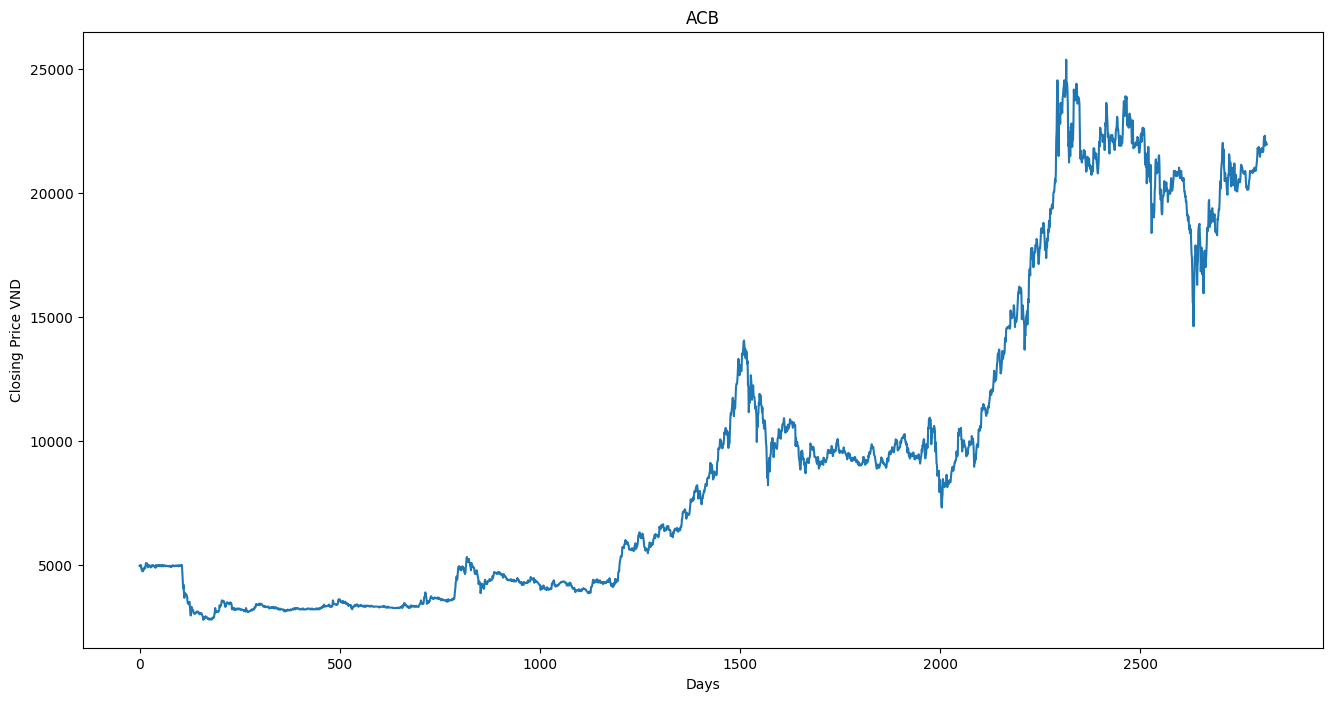

In [18]:
# Visualizing the closing prices of the data.
plt.figure(figsize=(16,8))
plt.title('ACB')
plt.xlabel('Days')
plt.ylabel('Closing Price VND')
plt.plot(df['Close'])
plt.show()

In [19]:
list_of_features = ['macro_neg','macro_positive','macro_neutral','acb_neg','Close']
df2 = df[list_of_features]
df2.tail()

,macro_neg,macro_positive,macro_neutral,acb_neg,Close
2812,0.0,0.0,0.0,0.0,21900.0
2813,0.0,0.0,0.0,0.0,22050.0
2814,0.0,0.0,0.0,0.0,22050.0
2815,0.0,0.0,0.0,0.0,22000.0
2816,0.0,0.0,0.0,0.0,21950.0


In [20]:
df2 = pd.DataFrame(df2)     
df2.tail()

,macro_neg,macro_positive,macro_neutral,acb_neg,Close
2812,0.0,0.0,0.0,0.0,21900.0
2813,0.0,0.0,0.0,0.0,22050.0
2814,0.0,0.0,0.0,0.0,22050.0
2815,0.0,0.0,0.0,0.0,22000.0
2816,0.0,0.0,0.0,0.0,21950.0


In [21]:
# Prediction 235 days into the future.
future_days = 235
df2['Prediction'] = df2['Close'].shift(-future_days)

In [22]:
X = np.array(df2.drop(['Prediction'], axis= 1))[:-future_days]
print(X)

[[3.66307173e-01 3.23058960e-01 3.10633842e-01 0.00000000e+00
  4.97000000e+03]
 [4.09755051e-01 2.04809906e-01 3.85435047e-01 0.00000000e+00
  4.99000000e+03]
 [2.41943214e-01 2.60493782e-01 4.97563009e-01 4.16704996e-02
  4.99000000e+03]
 ...
 [2.84832638e-01 2.12613198e-01 5.02554174e-01 9.81407702e-01
  2.00900000e+04]
 [5.68025272e-01 8.36487943e-02 3.48325935e-01 0.00000000e+00
  2.00900000e+04]
 [1.65745161e-01 4.72009831e-01 3.62245027e-01 3.95116657e-02
  2.02100000e+04]]


In [23]:
y = np.array(df2['Prediction'])[:-future_days]
print(y)

[ 3220.  3220.  3270. ... 22050. 22000. 21950.]


In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [26]:
# Implementing Decision Tree Regression Algorithms.
tree = DecisionTreeRegressor().fit(x_train, y_train)

In [27]:
x_future = df2.drop(['Prediction'], axis= 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[4.78374548e-01, 2.73192424e-01, 2.48433025e-01, 2.64423923e-03,
        2.37600000e+04],
       [6.31164889e-01, 1.74444143e-01, 1.94390951e-01, 0.00000000e+00,
        2.35900000e+04],
       [5.97097518e-01, 2.05699058e-01, 1.97203413e-01, 0.00000000e+00,
        2.24500000e+04],
       ...,
       [2.84832638e-01, 2.12613198e-01, 5.02554174e-01, 9.81407702e-01,
        2.00900000e+04],
       [5.68025272e-01, 8.36487943e-02, 3.48325935e-01, 0.00000000e+00,
        2.00900000e+04],
       [1.65745161e-01, 4.72009831e-01, 3.62245027e-01, 3.95116657e-02,
        2.02100000e+04]])

In [28]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)

[20420. 20550. 20880. 20720. 20840. 20880. 20760. 20670. 20840. 20470.
 20670. 20720. 20840. 20760. 20840. 18840. 20760. 20590. 20720. 20760.
 20880. 20720. 20510. 20510. 20590. 20470. 20590. 20300. 20510. 20050.
 20590. 19880. 19630. 19670. 19340. 19090. 19130. 18880. 20300. 18880.
 18540. 19630. 18380. 18380. 20470. 18040. 17540. 20450. 16710. 15580.
 15620. 14620. 17370. 16660. 17420. 17830. 17880. 17630. 17830. 17040.
 16290. 17040. 17250. 18420. 14620. 18710. 18750. 18210. 17830. 21180.
 17250. 21720. 17330. 16710. 17370. 16960. 15950. 17040. 17580. 17670.
 17210. 17000. 17250. 17540. 17960. 18590. 18500. 18460. 18790. 15950.
 19710. 17580. 18630. 18920. 19250. 20550. 19250. 19130. 19380. 19210.
 19000. 18840. 19050. 19130. 19130. 18460. 18420. 18460. 18380. 17630.
 18290. 19250. 18920. 19090. 19340. 19300. 19590. 20210. 20470. 18630.
 20880. 18290. 22010. 21720. 22010. 21220. 21760. 21050. 20880. 19250.
 20800. 20550. 20590. 20470. 20210. 19960. 19920. 20510. 20720. 20720.
 21550

In [29]:
predictions = tree_prediction 
valid = df2[X.shape[0]:]
valid['Predictions'] = predictions

C:\Users\JamesDonKey\AppData\Local\Temp\ipykernel_11476\4118842179.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


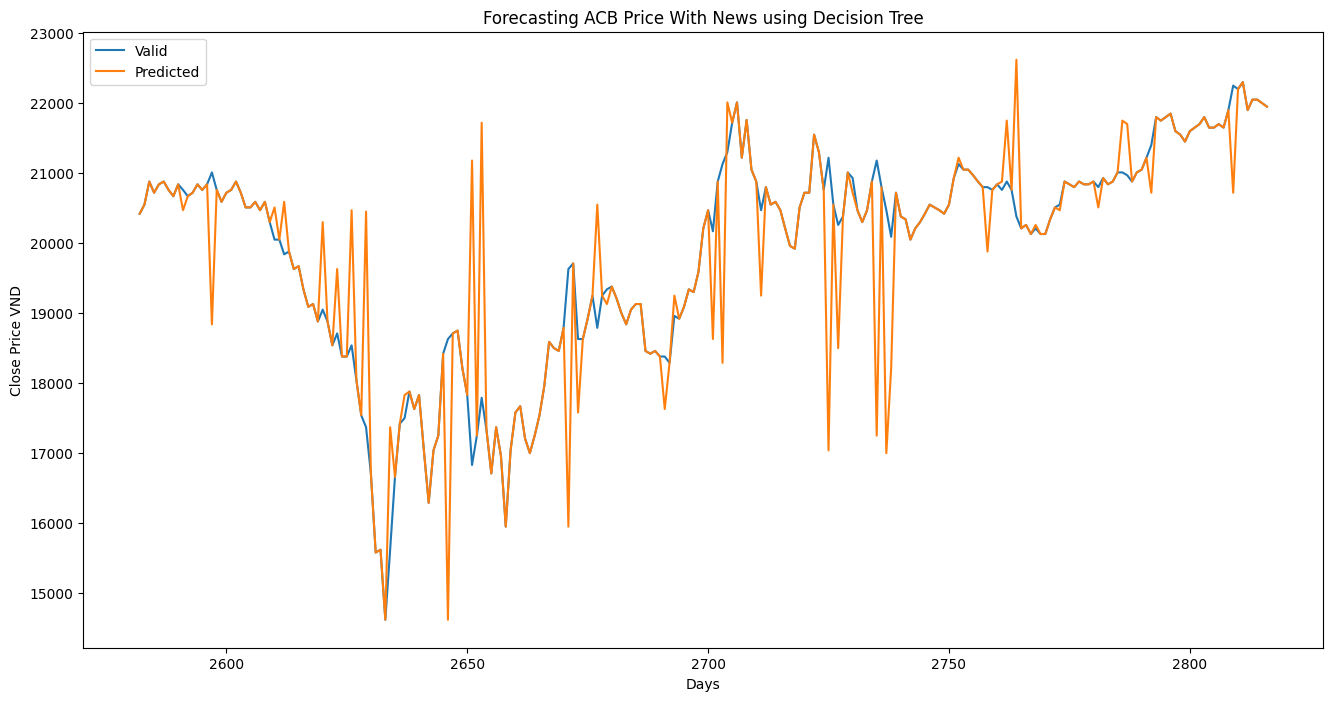

In [30]:
plt.figure(figsize=(16,8))
plt.title("Forecasting ACB Price With News using Decision Tree")
plt.xlabel('Days')
plt.ylabel('Close Price VND')
#plt.plot(df2['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(["Valid", 'Predicted'])
#plt.legend(["Original", "Valid", 'Predicted'])
plt.savefig('DT_withNews.png')
plt.show()

In [31]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,mean_absolute_percentage_error

print('Test R2 Score: ', r2_score(valid['Close'], valid['Predictions']))
print('Test MAE: ', mean_absolute_error(valid['Close'], valid['Predictions']))
print('Test RMSE: ', mean_squared_error(valid['Close'], valid['Predictions'], squared=False))
print('Test MAPE: ',mean_absolute_percentage_error(valid['Close'], valid['Predictions']))

Test R2 Score:  0.694771621404238
Test MAE:  268.25531914893617
Test RMSE:  845.3215427506257
Test MAPE:  0.013817570544783553
